# Изучение закономерностей успешности игр для интернет-магазина "Стримчик"

**Введение:**

Интернет-магазин "Стримчик" продает игры по всему миру, мы имеем данные до 2016, которые требуется проанализировать и сделать выводы для последующей кампании 2017 года.

**Цели:**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы . Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Задачи:**

Шаг 1:
- [x] Открыть файл с данными и изучить общую информацию.

Шаг 2. Подготовить данные:
- [x] Заменить названия столбцов (привести к нижнему регистру);
- [x] Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- [x] Обработать пропуски при необходимости:
    - [x] Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
    - [x] Описать причины, которые могли привести к пропускам;
    - [x] Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Провести исследовательский анализ данных:
- [x] Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x] Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x] Не учитывать в работе данные за предыдущие годы.
- [x] Какие платформы лидируют по продажам, растут или падают? Выберать несколько потенциально прибыльных платформ.
- [x] Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x] Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- [x] Соотнести выводы с продажами игр на других платформах.
- [x] Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составить портрет пользователя каждого региона:
Определить для пользователя каждого региона (NA, EU, JP):
- [x] Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- [x] Самые популярные жанры (топ-5). Поясните разницу.
- [x] Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверить гипотезы:
- [x] Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x] Задайте самостоятельно пороговое значение alpha.

Поясните:
- [x] Как вы сформулировали нулевую и альтернативную гипотезы;
- [x] Какой критерий применили для проверки гипотез и почему.

Шаг 6. 
- [x] Написать общий вывод.


# Описание данных


Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные приведены до 2016 года.

In [1]:
import pandas as pd
from math import sqrt
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom, norm

ModuleNotFoundError: No module named 'scipy'

### check

**Шаг 1:**

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
df.duplicated().sum()

0

**Вывод по 1 шагу:**

* В нашем распоряжении данные до 2016 года из 11 столбцов, где в 6 есть пропущенные значения, требующие корректировки.

* Название столбцов надо привести к нижнему регистру для последующей работы.

* Дубликаты отсутсвуют.

* Столбцы (Year_of_Release; User_Score,Critic_Score) имеют неверный тип данных.

* Данные репрезентативны.

### check

**Шаг 2:**

In [ ]:
# Приведем все столбцы к нижнему регистру.

df.columns = df.columns.str.lower()
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
df = df.drop_duplicates(['name', 'platform', 'year_of_release'])


In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

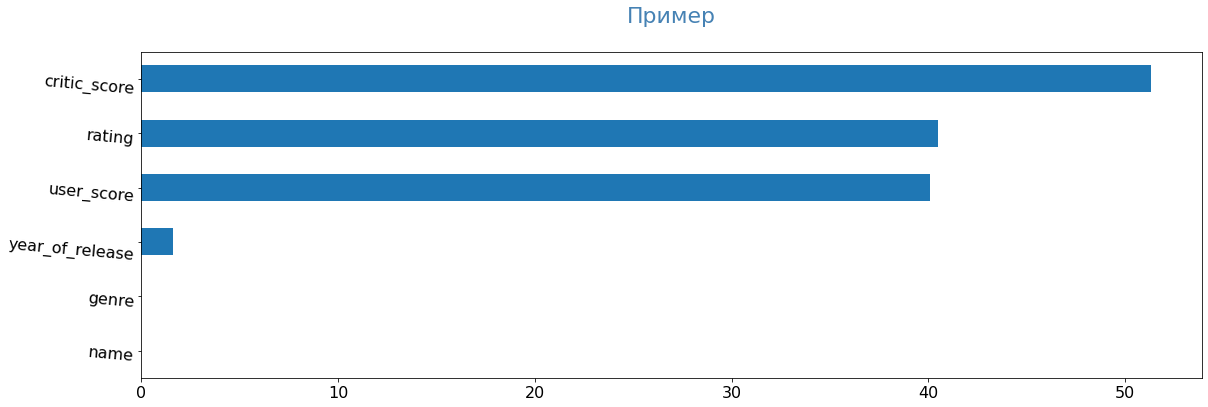

In [ ]:
pass_value_barh(df)

In [ ]:
# Обработаем пропуски
display(df.isna().sum())

# Строки с пропусками в столбцах name,year_of_release,genre 
# можно будет опустить, так как они не будут влиять на репрезентативность.

df = df.dropna(subset=['name'])
df = df.dropna(subset=['year_of_release'])
df = df.dropna(subset=['genre'])


name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

**Обработаем столбцы с пропусками в 40% и более.**

In [ ]:
# Обработаем пропуски в столбцах, где пропуски это 40 или более % данных.

#df['critic_score'] = df['critic_score'].fillna(0)
#df['user_score'] = df['user_score'].fillna(0)
# Рейтинг заменим на "неизвестно"
df['rating'] = df['rating'].fillna('unkn')
display(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [ ]:
# Опишем значения tbd в столбце user_score (tbd = будет определено позднее)
df[df['user_score']=='tbd']['user_score'].count()

# 2376 значений ингоривать не можем, заменим также нулем
df['user_score'] = df['user_score'].replace('tbd', 'NaN', regex=True)

In [ ]:
# Проверим пропуски
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [ ]:
# Изменим тип данных
df['year_of_release'] = df['year_of_release'].astype(int)
df['critic_score'] = df['critic_score'].astype(float)
df['user_score'] = df['user_score'].astype(float)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unkn
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unkn
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unkn
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unkn


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Посчитаем продажи по регионам в отдельном столбце

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unkn,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unkn,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unkn,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unkn,28.31


**Вывод по 2 шагу:**

* Название столбцов были преведены к общему регистру.

* Были обработаны пропуски:
    * Пропуски с низким процентом были удалены.
    * Пропуски, которые занимали 40+% данных были заменены на "0", в последующем анализе будем считать "0" за отсутсвие данных.
    * Пропуски в столбце rating были заполнены "unkn", так как данные не известны.
    
* Типы данных столбцов year_of_release были преведены к нужному типу.

* Были просчитаны общие продажи и занесены в отдельный столбец total_sales.


### check

**Шаг 3 Исследовательский анализ данных:**

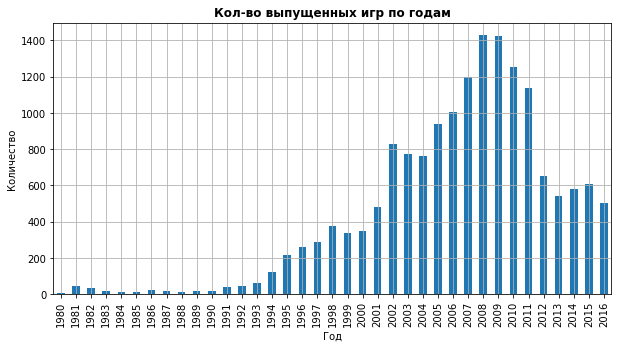

In [ ]:
# Визуализируем кол-во выпущенных игр по годам.
df_year_games_pivot = df.pivot_table(index = 'year_of_release', values = 'name', 
                                     aggfunc = 'count').sort_values(by='year_of_release',ascending=True)
df_year_games_pivot.plot(kind='bar',grid=True,figsize = (10,5))
ax = plt.gca()
ax.get_legend().remove()
plt.xlabel("Год", fontsize=10, fontweight="regular")
plt.ylabel("Количество", fontsize=10, fontweight="regular")
plt.title(label='Кол-во выпущенных игр по годам', loc='center', fontweight="bold");

По данному графику можем сделать вывод, что в 2008-2009 годах был пик по кол-ву выпущенных игр, в последующие года был спад, возможно это связано с увеличением кол-ва ресурсов для создания новых игр и спадом интереса к консольным играм.

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78


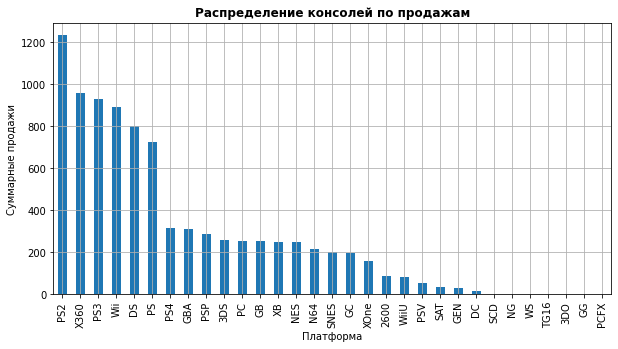

In [ ]:
# Посмотреть, как менялись продажи по платформам. 
# Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 
# За какой характерный срок появляются новые и исчезают старые платформы?

df_top_platform_pivot = df.pivot_table(index = 'platform', values = 'total_sales', 
                                     aggfunc = 'sum').sort_values(by='total_sales',ascending=False)

df_top_platform_pivot.plot(kind='bar',grid=True,figsize = (10,5))
ax = plt.gca()
ax.get_legend().remove()
plt.xlabel("Платформа", fontsize=10, fontweight="regular")
plt.ylabel("Суммарные продажи", fontsize=10, fontweight="regular")
plt.title(label='Распределение консолей по продажам', loc='center', fontweight="bold")
df_top_platform_pivot = df_top_platform_pivot.reset_index().rename_axis(None, axis=1)
# Выберем топ 5 консолей по продажам
df_top_platform_pivot.head(5)

Топ 5 консолей по продажам: PS2, X360, PS3, Wii, DS

In [ ]:
top_5 = df.pivot_table(index = 'platform', values = 'total_sales', 
                                     aggfunc = 'sum').sort_values(by='total_sales',ascending=False).head(5)
top_5 = top_5.reset_index().rename_axis(None, axis=1)
top_5

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78


In [ ]:
#Создадим переменную, хранящую список топ 5 платформ
top_platforms = top_5['platform'].to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [ ]:
# Создадим датасет с топ 5 консолями.
top_5_total = df.query('platform in @top_platforms')
top_5_total

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,unkn,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unkn,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unkn,0.01


Text(0.5, 1.0, 'Топ 5 консолей жизненный цикл')

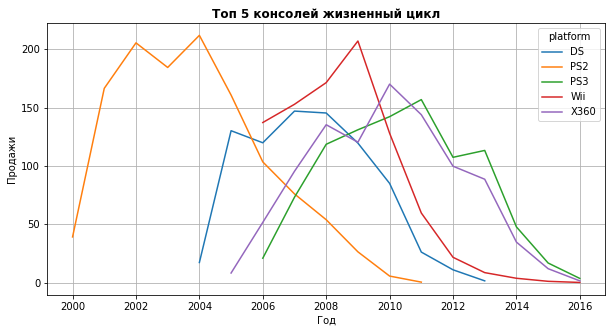

In [ ]:
top_5_total_pivot = top_5_total[top_5_total['year_of_release'] > 1999].pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc = 'sum')
top_5_total_pivot.plot(grid=True,figsize = (10,5))
plt.xlabel("Год", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Топ 5 консолей жизненный цикл', loc='center', fontweight="bold")

По данному графику, можно сделать вывод, что жизненный цикл консоли 8-10 лет, в зависимости от востребованности.

In [ ]:
# Создадим датасет с актуальным промежутком.
df_actual_years = df[df['year_of_release'] >= 2014].sort_values(by='total_sales',ascending=False)
df_actual_years.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unkn,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unkn,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unkn,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,unkn,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unkn,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Text(0.5, 1.0, 'Актуальные консоли')

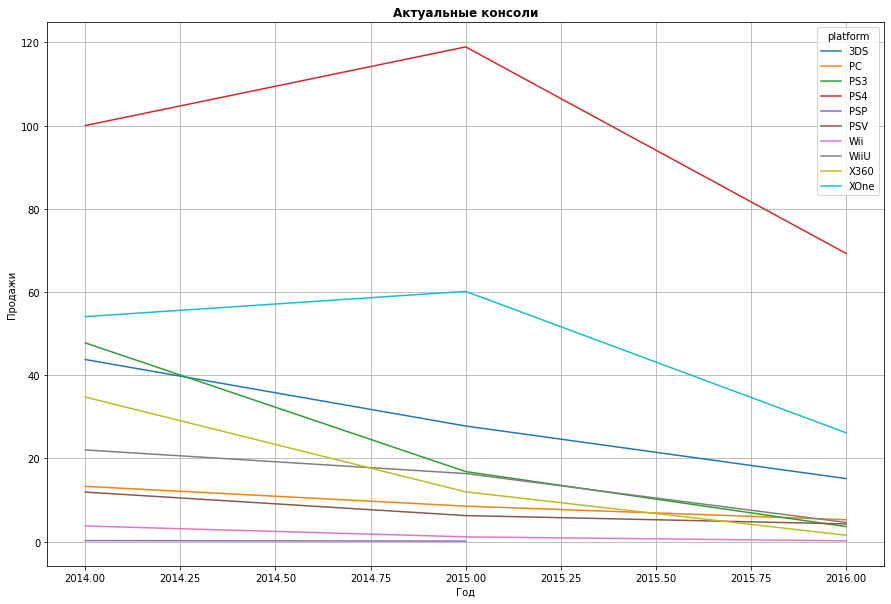

In [ ]:
# Создадим сводную таблицу с total sales на каждой консоли на актуальный период
df_actual_years_pivot = df_actual_years.pivot_table(index = 'year_of_release', columns='platform', 
                                                    values = 'total_sales', aggfunc = 'sum')
df_actual_years_pivot.plot(grid=True,figsize = (15,10))
plt.xlabel("Год", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Актуальные консоли', loc='center', fontweight="bold")

Из графика видно, что актуальные консоли не имеют возрастающих продаж, но выдели наиболее популярные мы можем: Ps4, XOne, PC, WiiU, 3DS.

In [ ]:
# Построим ящик с усами по глобальным продажам.
top_5_actual_platform_name = ['PS4', '3DS', 'XOne', 'WiiU', 'PC']
top_5_actual_platform = df_actual_years.query('platform in @top_5_actual_platform_name')
top_5_actual_platform_pivot = top_5_actual_platform.pivot_table(index='platform', values='total_sales', aggfunc='sum')
top_5_actual_platform_pivot = top_5_actual_platform_pivot.reset_index().rename_axis(None, axis=1)
top_5_actual_platform_pivot = top_5_actual_platform_pivot.sort_values(by='total_sales', ascending=False)
top_5_actual_platform_pivot

,platform,total_sales
2,PS4,288.15
4,XOne,140.36
0,3DS,86.68
3,WiiU,42.98
1,PC,27.05


Text(0.5, 1.0, 'Диаграмма размаха по глобальным продажам актуальных консолей')

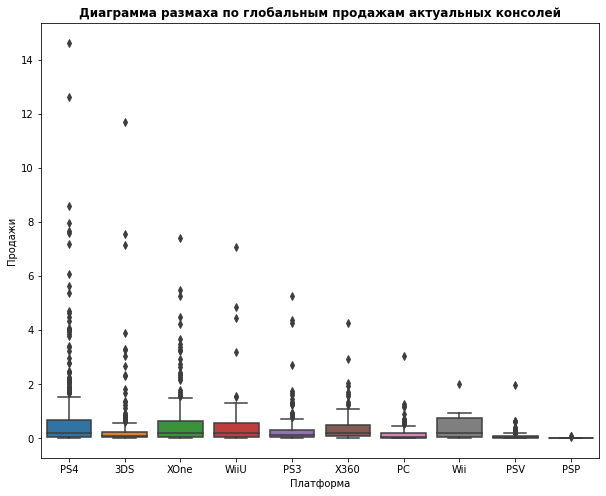

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="platform", y="total_sales", data = df_actual_years)
plt.xlabel("Платформа", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Диаграмма размаха по глобальным продажам актуальных консолей', loc='center', fontweight="bold")

Text(0.5, 1.0, 'Диаграмма размаха по глобальным продажам актуальных консолей')

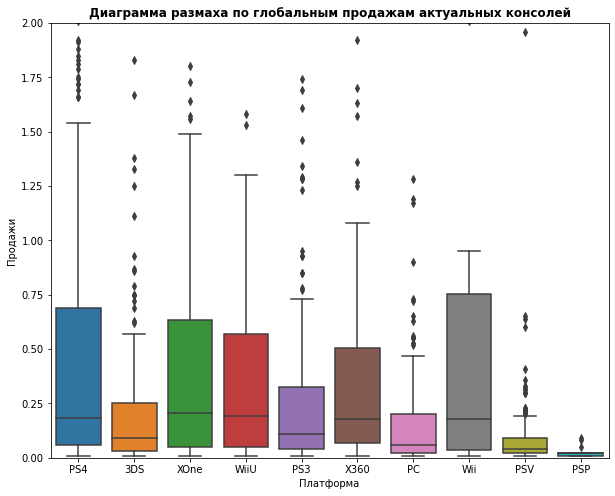

In [ ]:
plt.figure(figsize=(10, 8))
plt.ylim(0,2)
sns.boxplot(x="platform", y="total_sales", data = df_actual_years)
plt.xlabel("Платформа", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Диаграмма размаха по глобальным продажам актуальных консолей', loc='center', fontweight="bold")

По диаграмме размаха, мы можем увидеть, что медианные значения у всех платформ разные, лидирование по продажам за актуальный период в 3 года занимает Ps4, XOne, X360, по всем консолям есть выбросы по продажам.

In [ ]:
#Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
#Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.

# Самая популярная консоль - Ps4

df_ps4 = df_actual_years.query('platform == "PS4"')
df_ps4 = df_ps4[['critic_score', 'user_score', 'total_sales']]
df_ps4.head(10)

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66
94,85.0,5.0,7.60
105,87.0,6.5,7.17
143,82.0,5.7,6.08
154,76.0,6.1,5.64
171,93.0,7.9,5.39


Text(0.5, 1.0, 'Зависимость продаж Ps4 от оценок критиков ')

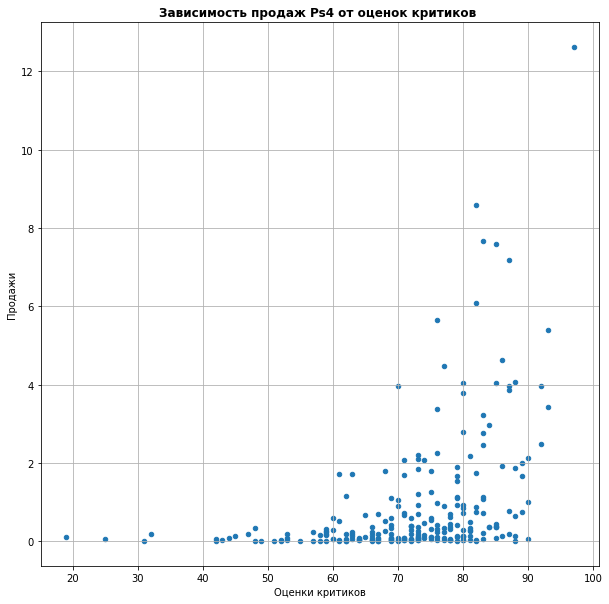

In [ ]:
df_ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(10,10), grid=True)
plt.xlabel("Оценки критиков", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Зависимость продаж Ps4 от оценок критиков ', loc='center', fontweight="bold")

Text(0.5, 1.0, 'Зависимость продаж Ps4 от оценок пользователей')

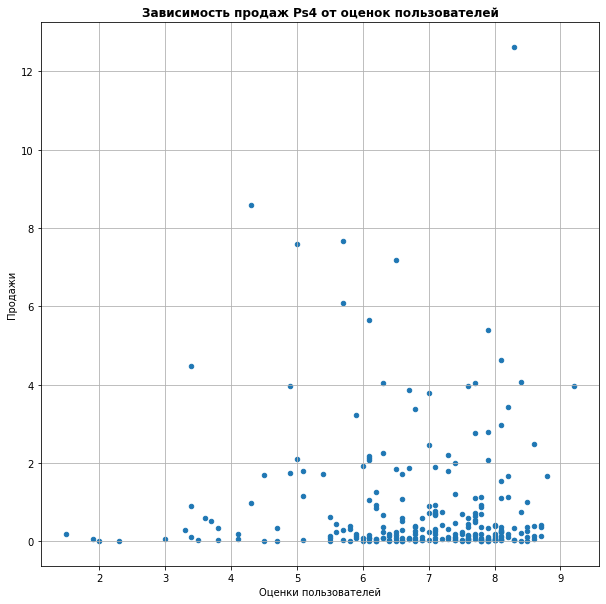

In [ ]:
df_ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(10,10), grid=True)
plt.xlabel("Оценки пользователей", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Зависимость продаж Ps4 от оценок пользователей', loc='center', fontweight="bold")

Исходя из двух графиков зависимостей, мы можем сделать вывод, что оценки в основной массе не влияют на продажи игр.

,critic_score,user_score,total_sales
critic_score,1.000,0.546,0.403
user_score,0.546,1.000,-0.040
total_sales,0.403,-0.040,1.000


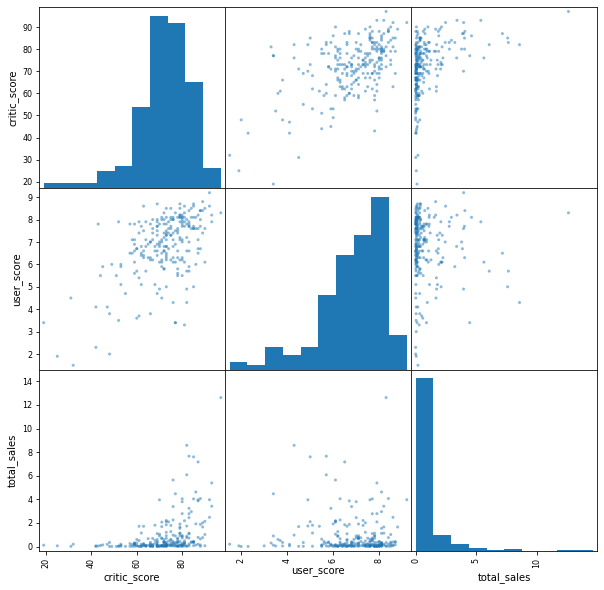

In [ ]:
pd.plotting.scatter_matrix(df_ps4,figsize=(10,10), grid=True)
df_ps4.corr().round(3)

Выводы по результатам постройки зависимости: 
* Есть видимая зависимость между оценками критиков и оценками пользователей, чем выше оценки критиков, тем выше ставят пользователи и наоборот, также видим среднюю зависимость продаж от оценок критиков.

,critic_score,user_score,total_sales
critic_score,1.000,0.491,0.330
user_score,0.491,1.000,0.016
total_sales,0.330,0.016,1.000


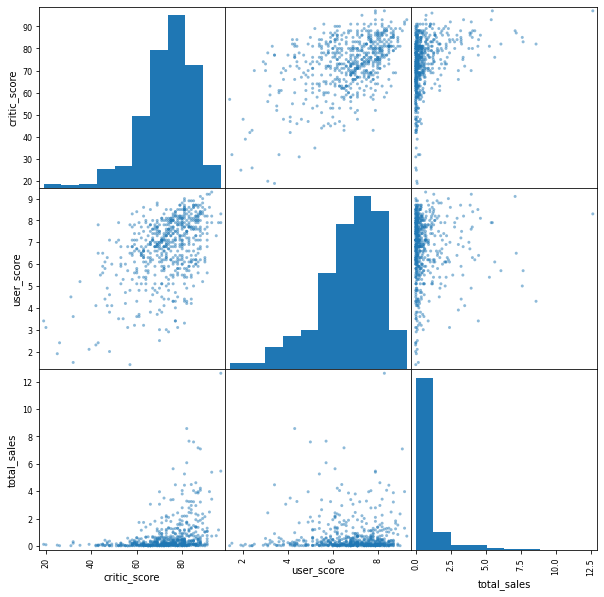

In [ ]:
# Соотнесем выводы с другими платформами
top_5_actual_platform = top_5_actual_platform.query('user_score > 0 and critic_score > 0')
pd.plotting.scatter_matrix(top_5_actual_platform[['critic_score', 'user_score', 'total_sales']], figsize=(10,10), alpha=0.5);
top_5_actual_platform[['critic_score', 'user_score', 'total_sales']].corr().round(3)

Соотнеся зависимости со всеми актуальным платформами, мы делаем такой же вывод, что корелляция между оценками критиков и оценками пользователей положительно средняя (0.49), также можем заметить среднюю положительную зависимость продаж от оценок критиков (0.33).

In [ ]:
# Распределение игр по жанрам
df_actual_genre_pivot = top_5_actual_platform.pivot_table(index = 'genre', values = ('name','total_sales',),
                                   aggfunc = ({'name': len ,'total_sales': sum,}))
df_actual_genre_pivot.rename(columns = {'name' : 'number'}, inplace = True)
df_actual_genre_pivot = df_actual_genre_pivot.reset_index().rename_axis(None, axis=1)
df_actual_genre_pivot = df_actual_genre_pivot.sort_values(by='total_sales',ascending=False)
df_actual_genre_pivot

,genre,number,total_sales
0,Action,195,117.55
8,Shooter,80,106.57
10,Sports,76,75.26
7,Role-Playing,64,41.43
6,Racing,37,20.72
4,Platform,24,14.85
3,Misc,27,10.86
2,Fighting,19,10.35
9,Simulation,19,9.68
1,Adventure,26,5.12


Text(0.5, 1.0, 'Актуальные жанры')

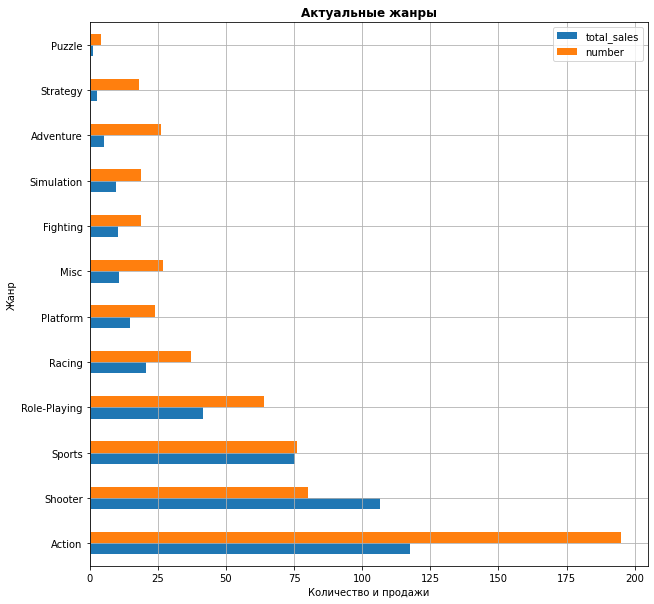

In [ ]:
df_actual_genre_pivot.plot(kind='barh', x='genre', y= {'total_sales','number'}, figsize=(10,10), grid=True)
plt.xlabel("Количество и продажи", fontsize=10, fontweight="regular")
plt.ylabel("Жанр", fontsize=10, fontweight="regular")
plt.title(label='Актуальные жанры', loc='center', fontweight="bold")

По графику можно сделать вывод, что самые продаваемые жанры:

* Action

* Shooter

* Role-Playing

* Sports

* Platform



Text(0.5, 1.0, 'Диаграмма размаха по глобальным продажам актуальных жанров')

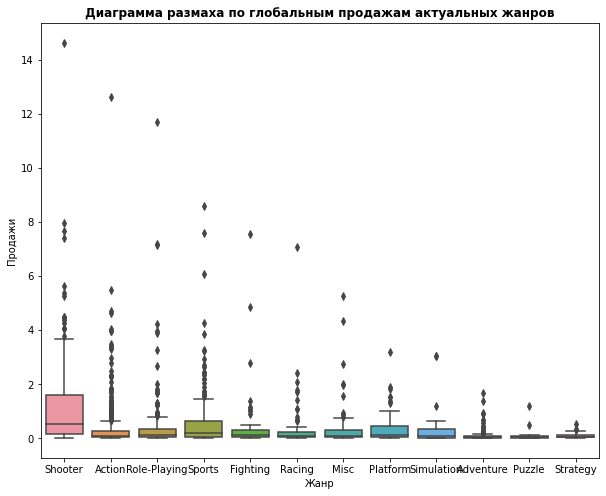

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="genre", y="total_sales", data = df_actual_years)
plt.xlabel("Жанр", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Диаграмма размаха по глобальным продажам актуальных жанров', loc='center', fontweight="bold")

Text(0.5, 1.0, 'Диаграмма размаха по глобальным продажам актуальных жанров')

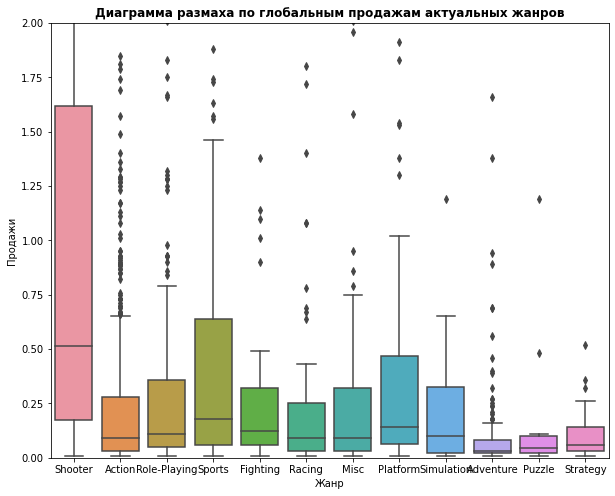

In [ ]:

plt.figure(figsize=(10, 8))
plt.ylim(0,2)
sns.boxplot(x ="genre", y="total_sales", data = df_actual_years)
plt.xlabel("Жанр", fontsize=10, fontweight="regular")
plt.ylabel("Продажи", fontsize=10, fontweight="regular")
plt.title(label='Диаграмма размаха по глобальным продажам актуальных жанров', loc='center', fontweight="bold")

In [ ]:
df_actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unkn,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unkn,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unkn,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,2016,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016,Adventure,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
16270,Hyakka Yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,unkn,0.01
16276,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unkn,0.01


По графикам мы видим, большой разброс по третьей квартили, особенно у таких жанров, как Shooter, Sports и Platform

**Вывод по 3 шагу:**

* Актуальный период для оценки продаж 3 года.

* Перспективные платформы:
    * PS4.
    * 3DS.
    * XOne.
    * PC.
    * WiiU.
 
 
* Оценки критиков и оценки пользователей зависят друг от друга.

* Самые востребованные жанры:
  * Action.
  * Shooter.
  * Role-Playing.
  * Sports.
  * Platform.


**Шаг 4:**

In [ ]:
# Продажи по реигонам
df_actual_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unkn,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unkn,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unkn,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16264,Worms: WMD,XOne,2016,Action,0.01,0.00,0.00,0.00,75.0,8.1,E10+,0.01
16267,The Book of Unwritten Tales 2,WiiU,2016,Adventure,0.00,0.01,0.00,0.00,NaN,NaN,T,0.01
16270,Hyakka Yakou,PSV,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,unkn,0.01
16276,Sangoku Koi Senki: Omoide Gaeshi - CS Edition,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unkn,0.01


In [ ]:

table_na_region_sale = df_actual_years.loc[:,['platform', 'na_sales']]
table_na_region_sale = table_na_region_sale.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_other = table_na_region_sale[:5]
na_other = na_other.append({'platform': 'Other', 'na_sales': 
                            table_na_region_sale['na_sales'].sum()-table_na_region_sale['na_sales'][:5].sum()}, 
                           ignore_index = True)
display(na_other)

table_eu_region_sale = df_actual_years.loc[:,['platform', 'eu_sales']]
table_eu_region_sale = table_eu_region_sale.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_other = table_eu_region_sale[:5]
eu_other = eu_other.append({'platform': 'Other', 'eu_sales': 
                            table_eu_region_sale['eu_sales'].sum()-table_eu_region_sale['eu_sales'][:5].sum()}, 
                           ignore_index = True)
display(eu_other)

table_jp_region_sale = df_actual_years.loc[:,['platform', 'jp_sales']]
table_jp_region_sale = table_jp_region_sale.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_other = table_jp_region_sale[:5]
jp_other = jp_other.append({'platform': 'Other', 'jp_sales': 
                            table_jp_region_sale['jp_sales'].sum()-table_jp_region_sale['jp_sales'][:5].sum()}, 
                           ignore_index = True)

display(jp_other)



,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,Other,31.19


,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,Other,34.76


,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,Other,0.76


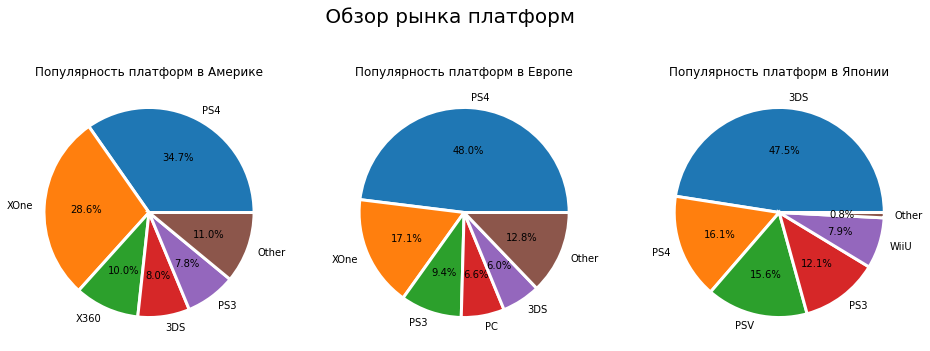

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
region = ['na_sales', 'eu_sales', 'jp_sales']


sizes_na = na_other['na_sales'].values
sizes_eu = eu_other['eu_sales'].values
sizes_jp = jp_other['jp_sales'].values

ax1.pie(sizes_na, labels=na_other['platform'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.set_title(f'Популярность платформ в Америке')
ax2.pie(sizes_eu, labels=eu_other['platform'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.set_title(f'Популярность платформ в Европе')
ax3.pie(sizes_jp, labels=jp_other['platform'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.set_title(f'Популярность платформ в Японии')

fig.suptitle(' Обзор рынка платформ ', fontsize=20)

plt.show()


Вывод по графику:

* Потребители в США:

    * ТОП-5 : Ps4 (34,7%), XOne(28,6%), X360(10%), 3DS(8%), Ps3(7.8%), остальной рынок в 11% занимают другие платформы.
    
* Потребители в Европе:

    * ТОП-5 : Ps4 (48%), XOne(17,1%), Ps3(10%), PC(6,6%), 3DS(6%), остальной рынок в 12,8% занимают другие платформы.

* Потребители Японии:
    * ТОП-5 : 3DS (47,5%), Ps4(16,1%), PSV(15,6%), Ps3(12,1%), WiiU(7,9%), остальной рынок в 0,8% занимают другие платформы.
    
    
Можно сделать выбор что пользователи в Сша и Европе имеют малые отличия, но в целом схожи, однако в Японии отдают предпочтение к портативным платформам.

In [ ]:
# check
df_actual_years.pivot_table(index = 'platform', values = ('na_sales','eu_sales','jp_sales'),
                                   aggfunc = ({'na_sales': sum ,'eu_sales': sum, 'jp_sales': sum}))

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


In [ ]:
table_na_region_genre = df_actual_years.loc[:,['genre', 'na_sales']]
table_na_region_genre = table_na_region_genre.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_other_genre = table_na_region_genre[:5]
na_other_genre = na_other_genre.append({'genre': 'Other', 'na_sales': 
                            table_na_region_genre['na_sales'].sum()-table_na_region_genre['na_sales'][:5].sum()}, 
                           ignore_index = True)
display(na_other_genre)

table_eu_region_genre = df_actual_years.loc[:,['genre', 'eu_sales']]
table_eu_region_genre = table_eu_region_genre.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_other_genre = table_eu_region_genre[:5]
eu_other_genre = eu_other_genre.append({'genre': 'Other', 'eu_sales': 
                            table_eu_region_genre['eu_sales'].sum()-table_eu_region_genre['eu_sales'][:5].sum()}, 
                           ignore_index = True)
display(eu_other_genre)

table_jp_region_genre = df_actual_years.loc[:,['genre', 'jp_sales']]
table_jp_region_genre = table_jp_region_genre.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_other_genre = table_jp_region_genre[:5]
jp_other_genre = jp_other_genre.append({'genre': 'Other', 'jp_sales': 
                            table_jp_region_genre['jp_sales'].sum()-table_jp_region_genre['jp_sales'][:5].sum()}, 
                           ignore_index = True)

display(jp_other_genre)

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Other,37.86


,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Other,42.45


,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Other,15.50


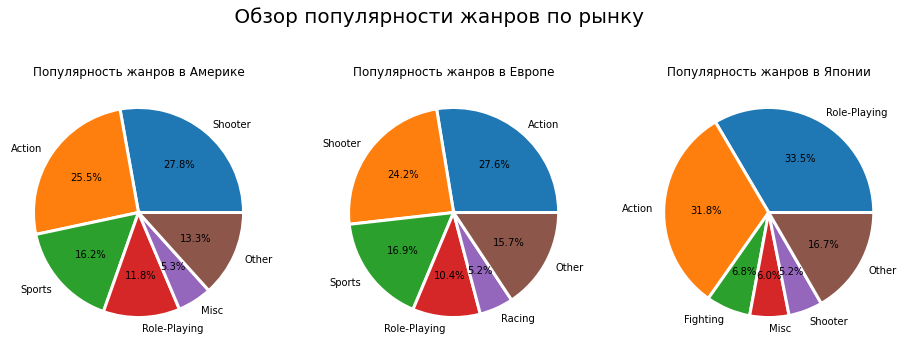

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

sizes_na = na_other_genre['na_sales'].values
sizes_eu = eu_other_genre['eu_sales'].values
sizes_jp = jp_other_genre['jp_sales'].values

ax1.pie(sizes_na, labels=na_other_genre['genre'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.set_title(f'Популярность жанров в Америке')
ax2.pie(sizes_eu, labels=eu_other_genre['genre'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.set_title(f'Популярность жанров в Европе')
ax3.pie(sizes_jp, labels=jp_other_genre['genre'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.set_title(f'Популярность жанров в Японии')
fig.suptitle(' Обзор популярности жанров по рынку ', fontsize=20)
plt.show()

Вывод по графику:

* Потребители в США:

    * ТОП-5 : Shooter (27,8%), Action(25,5%), Sports(16,2%), Role-Playing(11,8%), Misc(5,3%), остальной рынок в 13% занимают другие жанры.
    
* Потребители в Европе:

    * ТОП-5 : Action (27,6%), Shooter(24,2%), Sports(16,9%), Role-Playing(10,4%), Racing(5,2%), остальной рынок в 15,7% занимают другие жанры.

* Потребители Японии:
    * ТОП-5 : Role-Playing (33,5%), Action(31,8%), Fighting(6,8%), Misc(6%), Shooter(5,2%), остальной рынок в 16,7% занимают другие жанры.
    
    
Можно сделать выбор что пользователи в Сша и Европе имеют малые отличия, но в целом схожи, однако в Японии отдают предпочтение
таким жанрам как RP, Action и Fighting.

In [ ]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
table_na_region_rating = df_actual_years.loc[:,['rating', 'na_sales']]
table_na_region_rating = table_na_region_rating.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
na_rating_top = table_na_region_rating[:5]

display(na_rating_top)

table_eu_region_rating = df_actual_years.loc[:,['rating', 'eu_sales']]
table_eu_region_rating = table_eu_region_rating.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
eu_rating_top = table_eu_region_rating[:5]

display(eu_rating_top)

table_jp_region_rating = df_actual_years.loc[:,['rating', 'jp_sales']]
table_jp_region_rating = table_jp_region_rating.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
jp_rating_top = table_jp_region_rating[:5]


display(jp_rating_top)

,rating,na_sales
0,M,96.42
1,unkn,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


,rating,eu_sales
0,M,93.44
1,unkn,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


,rating,jp_sales
0,unkn,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


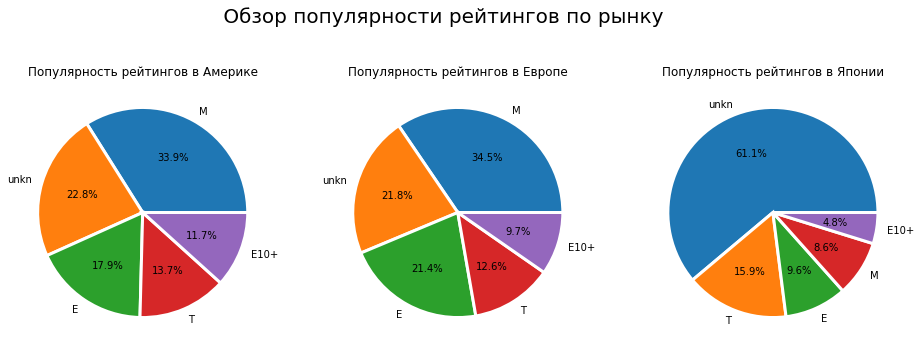

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
sizes_na = na_rating_top['na_sales'].values
sizes_eu = eu_rating_top['eu_sales'].values
sizes_jp = jp_rating_top['jp_sales'].values

ax1.pie(sizes_na, labels=na_rating_top['rating'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax1.set_title(f'Популярность рейтингов в Америке')
ax2.pie(sizes_eu, labels=eu_rating_top['rating'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax2.set_title(f'Популярность рейтингов в Европе')
ax3.pie(sizes_jp, labels=jp_rating_top['rating'], autopct='%1.1f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
ax3.set_title(f'Популярность рейтингов в Японии')
fig.suptitle(' Обзор популярности рейтингов по рынку ', fontsize=20)
plt.show()

Вывод по графику:

* В США и Европе основной рейтинг продаж, M и E, то есть 17+ или " Для всех возсрастов "
.
* Потребители Японии в тоже время делают выбор в пользу (Teen) в играх предназначен для подростков от 13 лет, E и E10+, то есть для "для всех возрастов" и "для всех возрастов 10+"

* Также стоит учитывать данные, где рейтинг неизвестен "unkn"


**Вывод по 4 шагу:**

* Потребители в США:

    * ТОП-5 : Ps4 (34,7%), XOne(28,6%), X360(10%), 3DS(8%), Ps3(7.8%), остальной рынок в 11% занимают другие платформы.    
    * Пользователи этого региона в основном покупают игры в жанрах:
        * Shooter
        * Action
        * Sports
        * Role-Playing
        * Misc
        
    * Преобладают игры с рейтингом E и M.
    
* Потребители в Европе:

    * ТОП-5 : Ps4 (48%), XOne(17,1%), Ps3(10%), PC(6,6%), 3DS(6%), остальной рынок в 12,8% занимают другие платформы.
    * Пользователи этого региона в основном покупают игры в жанрах:
        * Action
        * Shooter
        * Sports
        * Role-Playing
        * Racing
        
    * Преобладают игры с рейтингом E и M.
 

* Потребители Японии:

    * ТОП-5 : 3DS (47,5%), Ps4(16,1%), PSV(15,6%), Ps3(12,1%), WiiU(7,9%), остальной рынок в 0,8% занимают другие платформы.

    * Пользователи этих регинов в основном покупают игры в жанрах:
        * Role-Playing
        * Action
        * Fighting
        * Misc
        * Shooter
        
    * Преобладают игры с рейтингом T, E и E10+.

**Шаг 5. Проверить гипотезы**

Проверить гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0 : Средние пользовательские рейтинги  Xbox One = cредним пользовательским рейтингам платформ PC.

H1 : Средние пользовательские рейтинги  Xbox One != cредним пользовательским рейтингам платформ PC.

In [ ]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
# Создадим фреймы с средними рейтингами.
# Отсеим "0", где п.рейтинг был пропущен
# и выравнием период использования платформ
df_xbox_one = df_actual_years.query('platform == "XOne" and user_score > 0 and year_of_release >= 2015') 
df_pc = df_actual_years.query('platform == "PC" and user_score > 0 and year_of_release >= 2015') 
# Так как мы используем метод st.ttest_ind, проверим равны ли дисперсии двух совокупностей.
print('Дисперсия XOne =', np.var(df_xbox_one['user_score']))    
print('Дисперсия PC =',  np.var(df_pc['user_score']))

Дисперсия XOne = 2.1082234820025954
Дисперсия PC = 3.0739158163265303


In [ ]:
# Так как дисперсии рахные используем equal_var = False
results = st.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'],equal_var = False)
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.294630886400333
Не удалось отвергнуть нулевую гипотезу


Не удалось отвергнуть гиопетзу о равенстве средних пользовательских оценок для платформ PC и XOne, это говорит нам о том, что с большой вероятностью две совокупности равны.

In [ ]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Проверить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

H0 : Средние пользовательские рейтинги  Action = cредним пользовательским рейтингам Sports.

H1 : Средние пользовательские рейтинги  Action != cредним пользовательским рейтингам Sports.

In [ ]:
df_action = df_actual_years.query('genre == "Action" and user_score > 0')
df_sports = df_actual_years.query('genre == "Sports" and user_score > 0')

# Также проверим дисперсии двух совокупностей
print('Дисперсия Action =', np.var(df_action['user_score']))    
print('Дисперсия Sports =',  np.var(df_sports['user_score']))

Дисперсия Action = 1.8920844811753905
Дисперсия Sports = 3.4198375596751185


In [ ]:
results = st.ttest_ind(df_action['user_score'], df_sports['user_score'],equal_var = False, alternative = 'two-sided')
alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.1825550382645106e-14
Отвергаем нулевую гипотезу


Отвергая нулевую гипотезу, мы можем сказать, что с большей вероятностью средние пользвоательские рейтинги жанров Action и Sports отличаются.

**Вывод по 5 шагу:**

* Для проверки гипотез был использован метод st.ttest_ind, так как речь шла о равенстве или неравенстве двух совокупностей.


* В каждой из гипотез, были проверены две совокупности на равенство дисперсий, в результате оказалось, что они не равны и в методе надо было использовать параметр equal_var = False.


* По **первой** гипотезе был сделан вывод, что с большей вероятностью средние пользовательские оценки между платформами PC и XOne **равны**.


* По **второй** гипотезе был сделан вывод, что с большей вероятностью  средние пользовательские оценки между жанрами Action и Sports **неравны**.

### check

# Общий вывод:

Представленные для анализа данные содержали информацию из открытых источников, где доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года.

**Данные**

* В процессе анализа и обработки данных были выявлены проблемы с названием столбцов, пропусками в данных и неправельным типом данных в некоторых стоблцах:

    * Названия столбцов были приведены к общему регистру.
    * Пропуски в данных, где % пропусков не превышал порог, были удалены.
    * Пропуски в данных в столбца с оценками пользвателей и критиков не заполнялись, на общую картину не влияют.
    * Типы данных столбцов year_of_release были преведены к нужному типу.
    
* Был создан дополнительный столбец total_sales с данными об общих продажах по всем регионам.

* Также были обработаны значения tbd

**Результаты исследования**

* По итогам анализа были сделаны такие выводы:

    * Актуальный период для оценки продаж 2 года.

    * Перспективные платформы:
        * PS4, XOne, 3DS, PC, Ps3.
    
    * Оценки критиков и оценки пользователей напрямую зависят друг от друга, но на продажи игр не влияют.
    
    * Самые востребованные жанры:
        * Action, Shooter, Role-Playing, Sports, Misc.
      

* Портеты пользвателей Америки, Европы и Японии:

    * Пользователи из Америки: 
    
        * В основной массе покупают игры PS4, XOne, X360, 3DS и Ps3.
            * Доля рынка Ps4 (34,7%), XOne(28,6%), X360(10%), 3DS(8%), Ps3(7.8%), другие(11%).
            
        * Рейтинг популярных по продажам игр это M(17+) и E(для всех возрастов).
        
        * Популярные жанры:
        
            * Shooter
            * Action
            * Sports
            * Role-Playing
            * Misc
            
    * Пользователи из Европы:
    
        * В основной массе покупают игры PS4, XOne, Ps3, Pc и 3DS
            * Доля рынка Ps4 (48%), XOne(17,1%), Ps3(10%), PC(6,6%), 3DS(6%), другие (12,8%).
            
        * Рейтинг популярных по продажам игр это M(17+) и E(для всех возрастов).
        
        * Популярные жанры:
        
            * Action
            * Shooter
            * Sports
            * Role-Playing
            * Racingc
    
    * Пользователи из Японии:
    
        * Популярностью пользуются платформы 3DS, Ps4 и WiiU, где 3DC имеет большой отрыв.
            * Доля рынка 3DS (47,5%), Ps4(16,1%), PSV(15,6%), Ps3(12,1%), WiiU(7,9%), другие платформы(0,8%)
            
        * Рейтинг популярных игр это T, E и E10+.
        
        * Популярные жанры:
            * Role-Playing
            * Action
            * Fighting
            * Misc
            * Shoote
        
    
* В заключении были проведены проверки гипотез:

    * По результатам проверки первой гипотезы, был сделан вывод, что с большей вероятностью средние пользовательские оценки между платформами PC и XOne равны.

    * По результатам проверки второй гипотезы, мы можем предположить, что с большей вероятностью средние пользовательские оценки между жанрами Action и Sports неравны.
    
**Рекомендации:**

   Исходя из вышесказанных результатов, хорошим решением для компании "Стримчик" будет уделить внимание на игры таких платформ, как Ps4, 3DS, Xone, Ps3 и PC. Однако, стоит учитывать и готовиться к следующему поколению платформ, тщательно их изучая. Также хорошим решением будет продавать Action, RP и Shooter игры, так как они будут всегда нарасхват. 
   Важно учитывать региональные предпочтения к платформам и жанрам и помнить, что чем шире возрастной рейтинг, тем больше продаж.